In [94]:
import pandas as pd
import numpy as np

In [95]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [96]:
df['trtbps']= pd.cut(df['trtbps'], bins=[94,120,139,200], labels = [0,1,2])

In [97]:
df['chol']= pd.cut(df['chol'], bins=[0,200,239,564], labels = [0,1,2])
df['age'] = pd.cut(df['age'], bins=[29,53,80], labels = [0, 1])

In [98]:
def get_data(data):  
      
    gen_data = data
    
    for rest_ecg in data['restecg'].unique():
        new_data =  gen_data[gen_data['restecg'] == rest_ecg]
        #print(seasonal_data.shape)
        thalachh_std = new_data['thalachh'].std()
        #print(thalachh_std)
        oldpeak_std = new_data['oldpeak'].std()

        for i in new_data.index:

            if np.random.randint(2) == 1:
                gen_data['thalachh'].values[i] += thalachh_std/10
            else:
                gen_data['thalachh'].values[i] -= thalachh_std/10
                
                    
            if np.random.randint(2) == 1:
                gen_data['oldpeak'].values[i] += oldpeak_std/10
            else:
                gen_data['oldpeak'].values[i] -= oldpeak_std/10
                    
    return gen_data

print(df.head())
std_data = get_data(df)

std_data.head()


  age  sex  cp trtbps chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  \
0   1    1   3      2    1    1        0       150     0      2.3    0    0   
1   0    1   2      1    2    0        1       187     0      3.5    0    0   
2   0    0   1      1    1    0        0       172     0      1.4    2    0   
3   1    1   1      0    1    0        1       178     0      0.8    2    0   
4   1    0   0      0    2    0        1       163     1      0.6    2    0   

   thall  output  
0      1       1  
1      2       1  
2      2       1  
3      2       1  
4      2       1  


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,1,1,3,2,1,1,0,152,0,2.421468,0,0,1,1
1,0,1,2,1,2,0,1,189,0,3.605456,0,0,2,1
2,0,0,1,1,1,0,0,174,0,1.278532,2,0,2,1
3,1,1,1,0,1,0,1,180,0,0.694544,2,0,2,1
4,1,0,0,0,2,0,1,165,1,0.494544,2,0,2,1


In [99]:
df = df.astype({'trtbps':'float64','chol':'float64'})
df.dtypes

age         category
sex            int64
cp             int64
trtbps       float64
chol         float64
fbs            int64
restecg        int64
thalachh       int64
exng           int64
oldpeak      float64
slp            int64
caa            int64
thall          int64
output         int64
dtype: object

<AxesSubplot:>

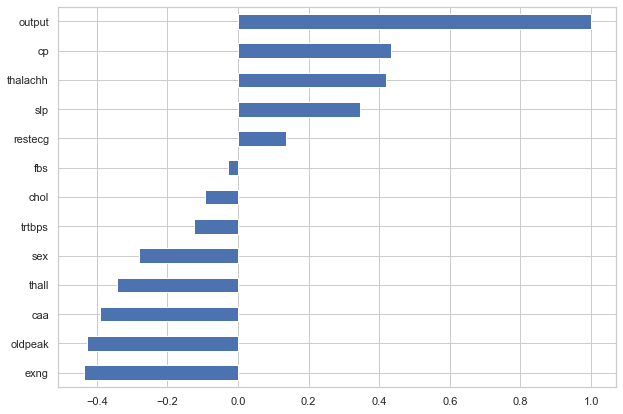

In [100]:
import seaborn as sns
sns.set_style("whitegrid")  
df.corr()['output'].sort_values().plot(kind = 'barh')

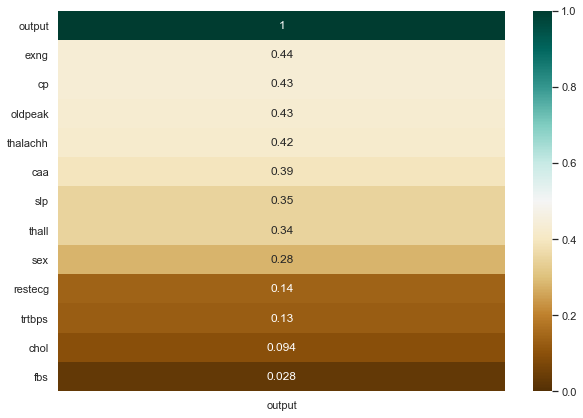

In [101]:
sns.heatmap(df.corr().loc[:,['output']].abs().sort_values(by=['output'], ascending=False), vmin=0, vmax=1, annot=True, cmap='BrBG', annot_kws={'size':12})
sns.set(rc={'figure.figsize':(10,7)});

In [102]:
df.trtbps

0      2.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
298    2.0
299    0.0
300    2.0
301    1.0
302    1.0
Name: trtbps, Length: 303, dtype: float64

<AxesSubplot:xlabel='trtbps', ylabel='count'>

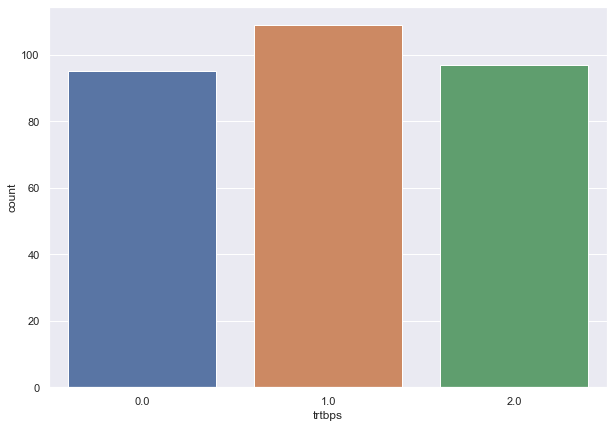

In [103]:
sns.countplot(x= df.trtbps)

<AxesSubplot:xlabel='age', ylabel='count'>

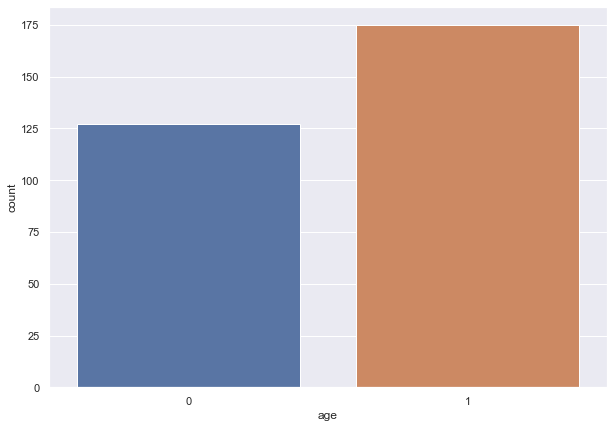

In [104]:
sns.countplot(x= df.age)

In [108]:
test_array = df['oldpeak'].to_numpy()
test_array= test_array.reshape(-1,1)
test_array

array([[ 2.42146793e+00],
       [ 3.60545605e+00],
       [ 1.27853207e+00],
       [ 6.94543950e-01],
       [ 4.94543950e-01],
       [ 2.94543950e-01],
       [ 1.17853207e+00],
       [-1.05456050e-01],
       [ 6.05456050e-01],
       [ 1.70545605e+00],
       [ 1.30545605e+00],
       [ 3.05456050e-01],
       [ 7.05456050e-01],
       [ 1.67853207e+00],
       [ 1.12146793e+00],
       [ 1.49454395e+00],
       [-1.05456050e-01],
       [ 2.70545605e+00],
       [ 1.60545605e+00],
       [ 1.90545605e+00],
       [ 6.05456050e-01],
       [ 5.05456050e-01],
       [ 1.05456050e-01],
       [ 8.94543950e-01],
       [ 1.29454395e+00],
       [ 5.05456050e-01],
       [ 1.49454395e+00],
       [ 7.05456050e-01],
       [ 6.78532066e-01],
       [ 1.07853207e+00],
       [-1.05456050e-01],
       [ 5.05456050e-01],
       [ 1.21467934e-01],
       [ 6.21467934e-01],
       [ 1.52146793e+00],
       [ 1.27853207e+00],
       [-1.05456050e-01],
       [ 1.47853207e+00],
       [ 9.0